TensorFlow version: 2.15.0
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/11


1688/1688 [==============================] - 4s 2ms/step - loss: 0.6786 - accuracy: 0.8202 - val_loss: 0.2

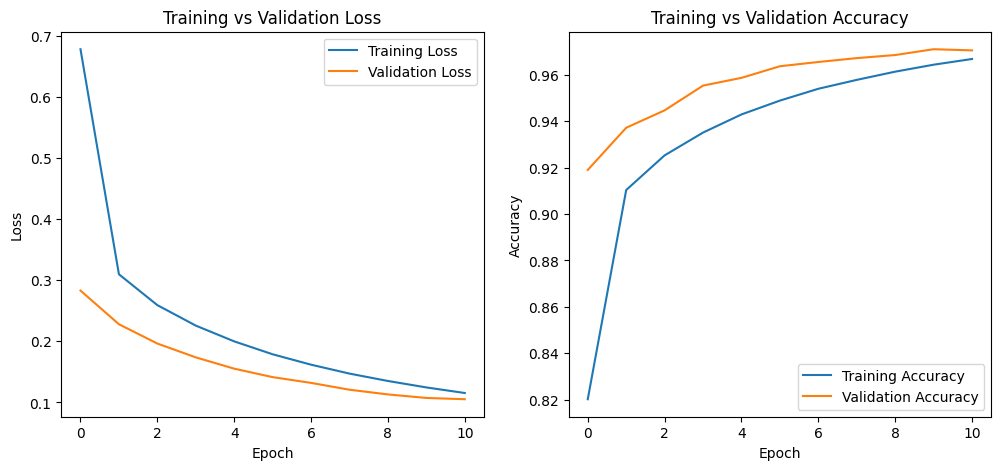

In [ ]:
# --------------------------------------------------------
# 1. Import required packages
# --------------------------------------------------------
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

print("TensorFlow version:", tf.__version__)

# --------------------------------------------------------
# 2. Load MNIST CSV files
# --------------------------------------------------------
train = pd.read_csv("C:/Users/UMESH/OneDrive/Desktop/LP_4/mnist_train.csv")
test = pd.read_csv("C:/Users/UMESH/OneDrive/Desktop/LP_4/mnist_test.csv")

# Extract labels (first column)
y_train = train.pop("label").values
y_test = test.pop("label").values

# Remaining 784 columns = pixel values
x_train = train.values
x_test = test.values

# Reshape 784 → 28×28 and normalize
x_train = x_train.reshape(-1, 28, 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28).astype("float32") / 255.0

# --------------------------------------------------------
# 3. Build Feedforward Neural Network
# --------------------------------------------------------
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert 28x28 → 784 vector
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0–9)
])

model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# --------------------------------------------------------
# 4. Train the model (11 epochs)
# --------------------------------------------------------
history = model.fit(
    x_train,
    y_train,
    epochs=11,
    batch_size=32,
    validation_data=(x_test,y_test)
)

# --------------------------------------------------------
# 5. Evaluate the model on test data
# --------------------------------------------------------
loss, accuracy = model.evaluate(x_test, y_test)
print("✅ Test Loss:", loss)
print("✅ Test Accuracy:", accuracy)

# --------------------------------------------------------
# 6. Plot training loss and accuracy
# --------------------------------------------------------
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
